## Thanks to:
https://stackoverflow.com/questions/37003272/how-to-compute-jaccard-similarity-from-a-pandas-dataframe

In [23]:
import pandas as pd
from sklearn.metrics import jaccard_similarity_score, pairwise_distances
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

In [3]:
dataframe = pd.read_csv('data/final_april_2019.csv', sep='\t', header=0)

In [4]:
#6-25213 vs 6-85169

print(dataframe.columns.tolist())

['Position', 'N', 'Samples', 'AL36985Q', 'AL-20243', 'T18-043', 'C-38373', 'AL59799', 'Al-46007.3', 'T-18-008', '43153', 'ID2014-43', 'Al-46007.17', 'MPZ06027636', 'ARG22974', '4035847', 'Al-45926.19', 'Nantua5', 'L-3662', 'L-4936', 'HMOS17048593', '1288', 'AC2110289', 'MGIT84', '102199313', 'P14-98629', 'P-1266', 'CCM1013', 'P-1600', 'P14-31824', 'Gui-16R', 'PT411', '207-15', 'R7', 'AL12520', '1296', '1195', 'AL1901108', 'AL27505', 'AL-2350209', '76-14485', 'F-27798', '1998205', '143518099', 'JP3', 'P89', 'P-5286', 'G018-0488', '458-41773', 'MGITTOUNAW', 'AI42221', 'IT-101', 'P-5249', '13263', 'Al-40657', 'L-3673', '87427', 'P2-10668', 'RABAT14', '6500', 'JP9', 'T18-054', '128-B-1300432', 'SRR1657068', '5378', 'BJN-CANARIA', '113524511', '6-49128', 'AL-24844', 'Ra', 'C-07349', 'DE9-lib9825', '6-17441', '56850173', 'VP7-936', 'JP7', 'R8', 'P107', 'P-5459', 'AL-93627', 'OP10', 'IT586', 'P1150', 'AL-67220', 'P-1207', 'G01683', 'P-1044', 'AL-3204708A', 'JP10', '6-85169', 'RABAT9', 'AI2809

In [5]:
dataframe.head()

,Position,N,Samples,AL36985Q,AL-20243,T18-043,C-38373,AL59799,Al-46007.3,T-18-008,...,T18-055,AL-75482,RABAT8,AI2935315,PT412,Al-5351508,5171825,AL68945,P-1491,Al-2893408
0,30,1,17129447,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,31,3,"AL18267,AL-4227810,AL68945",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,42,1,17129447,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,51,1,17129447,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,71,4,"6500,P-5707,P-5334,5275",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
var = "%s\t%s" % (dataframe.shape)
print(var)

93877	484


In [7]:
def compare_jaccard_columns(sample1, sample2, df):
    jaccard_similarity = jaccard_similarity_score(df[sample1], df[sample2])
    return jaccard_similarity

def compare_snp_columns(sample1, sample2, df):
    jaccard_similarity = jaccard_similarity_score(df[sample1], df[sample2]) #similarities between colums
    hamming_similarity = 1 - jaccard_similarity #disagreements between colums
    snp_distance = int(hamming_similarity * (len(df.index)+1))
    return snp_distance

def snp_distance_pairwise(dataframe, output_file):
    if os.path.exists(output_file):
        os.remove(output_file)
    with open(output_file, "a") as f:
        for sample1 in dataframe.iloc[:,3:].columns: #remove first 3 colums
            for sample2 in dataframe.iloc[:,3:].columns:
                snp_distance = compare_snp_columns(sample1, sample2, dataframe)
                if sample1 != sample2:
                    line_distance = "%s\t%s\t%s\n" % (sample1, sample2, snp_distance)
                    f.write(line_distance)

In [8]:
#snp_distance_pairwise(dataframe, 'data/test_data_pairwise_no_same_500.csv')

In [9]:
sample1='6-37190'
sample2='6-48233'
comparing2 = compare_jaccard_columns(sample1, sample2 , dataframe)
hamming2 = 1 - comparing2
print(comparing2)
print(hamming2)
print(int((hamming2 * (len(dataframe.index) +1))))
print(compare_snp_columns(sample1,sample2,dataframe))

0.999733694089074
0.0002663059109260235
25
25


In [10]:
#print("SNP distance between %s and %s are: %s" % (sample1, sample2, int((1 - comparing2) * len(dataframe.index + 1)
                                                                       
print("SNP distance between %s and %s are: %s" % (sample1, sample2, compare_snp_columns(sample1, sample2, dataframe)))

SNP distance between 6-37190 and 6-48233 are: 25


In [12]:
# Delete multiple columns from the dataframe
data_hamming = dataframe.set_index(dataframe['Position'].astype(int)).drop(['Position','N','Samples'], axis=1) #inplace=True


In [13]:
data_hamming.head()

,AL36985Q,AL-20243,T18-043,C-38373,AL59799,Al-46007.3,T-18-008,43153,ID2014-43,Al-46007.17,...,T18-055,AL-75482,RABAT8,AI2935315,PT412,Al-5351508,5171825,AL68945,P-1491,Al-2893408
Position,,,,,,,,,,,,,,,,,,,,,
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
hamming_distance = pairwise_distances(data_hamming.T, metric = "hamming") #dataframe.T means transposed


In [15]:
hamming_distance_df = pd.DataFrame(hamming_distance, index=data_hamming.columns, columns=data_hamming.columns) #Add index


snp_distance_df = pd.DataFrame(hamming_distance * len(data_hamming.index), index=data_hamming.columns, columns=data_hamming.columns) #Add index
snp_distance_df = snp_distance_df.astype(int)
#jac_sim = pd.DataFrame(jac_sim, index=df.columns, columns=df.columns)
# jac_sim = np.triu(jac_sim) to set the lower diagonal to zero
# jac_sim = np.tril(jac_sim) to set the upper diagonal to zero

In [16]:
snp_distance_df.astype(int)

,AL36985Q,AL-20243,T18-043,C-38373,AL59799,Al-46007.3,T-18-008,43153,ID2014-43,Al-46007.17,...,T18-055,AL-75482,RABAT8,AI2935315,PT412,Al-5351508,5171825,AL68945,P-1491,Al-2893408
AL36985Q,0,674,886,706,485,675,1100,1196,714,674,...,1170,684,671,667,1199,387,1128,612,709,354
AL-20243,674,0,884,272,765,425,1096,1182,440,426,...,1168,270,465,429,1191,683,1116,652,509,652
T18-043,886,884,0,812,433,887,576,930,904,886,...,810,884,751,855,933,913,862,842,709,880
C-38373,706,272,812,0,719,489,1048,1178,498,490,...,1140,338,471,491,1183,723,1112,680,517,692
AL59799,485,765,433,719,0,766,813,1061,789,765,...,975,767,658,746,1066,650,993,709,650,615
Al-46007.3,675,425,887,489,766,0,1097,1183,449,11,...,1173,449,240,162,1192,668,1115,659,528,635
T-18-008,1100,1096,576,1048,813,1097,0,520,1114,1096,...,340,1102,995,1077,523,1123,588,1064,961,1092
43153,1196,1182,930,1178,1061,1183,520,0,1202,1182,...,310,1202,1133,1171,191,1211,360,1176,1135,1180
ID2014-43,714,440,904,498,789,449,1114,1202,0,450,...,1188,466,495,461,1213,711,1140,692,441,680
Al-46007.17,674,426,886,490,765,11,1096,1182,450,0,...,1172,448,239,161,1191,667,1112,658,529,634


In [21]:
hamming_distance_df
#final_ddbb.to_csv(output_file, sep='\t', index=False)
hamming_distance_df.to_csv("data/matrix_distance_500.dist", sep='\t', index=True)

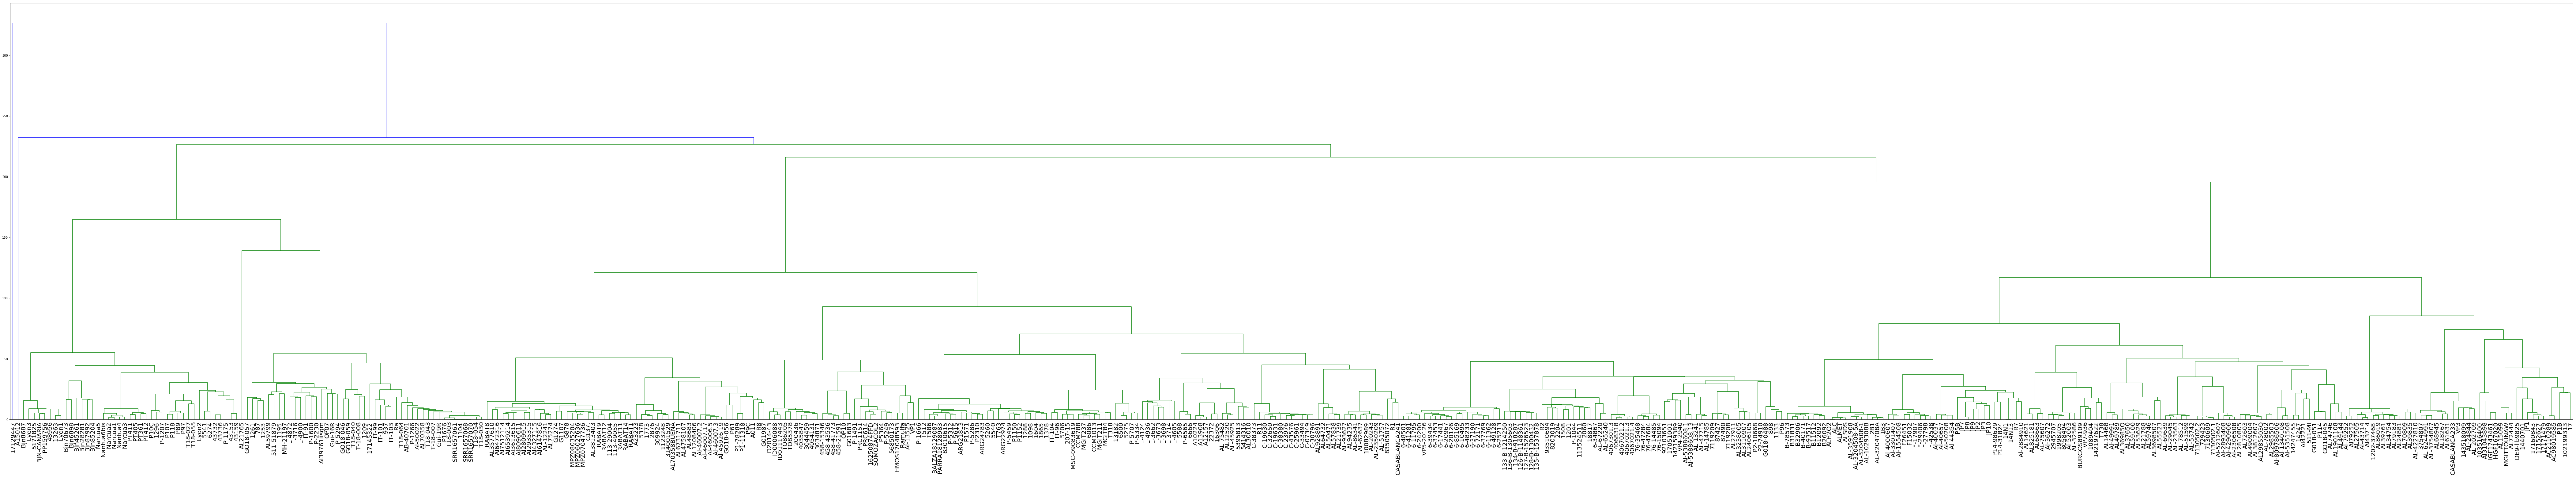

In [34]:
labelList = data_hamming.columns.tolist()
linked = shc.linkage(data_hamming.T, method='ward') #method='single'
plt.figure(figsize=(150, 25))
#plt.xticks(fontsize=tick_fontsize)
shc.dendrogram(linked, labels=labelList, distance_sort='descending', show_leaf_counts=True, leaf_font_size=20)

plt.show()

In [32]:
print(linked)

[[ 60.         236.           0.           2.        ]
 [359.         481.           0.           3.        ]
 [402.         482.           0.           4.        ]
 ...
 [955.         957.         226.79216739 479.        ]
 [177.         958.         232.23938743 480.        ]
 [235.         959.         326.66441465 481.        ]]


In [ ]:
#plt.figure(figsize=(10,10))
#sns.heatmap(snp_distance_df, annot=True, fmt='g', cmap="YlGnBu") #linewidths=.5, fmt="d"

In [ ]:
#sns.clustermap(snp_distance_df, annot=True, fmt='g', cmap="YlGnBu", figsize=(20, 20)) #linewidths=.5, fmt="d"

In [ ]:
#sns.clustermap(data_hamming, annot=False, cmap="YlGnBu", figsize=(13, 13)) #linewidths=.5, method="single"